In [3]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
%matplotlib inline

Using TensorFlow backend.


In [4]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [6]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98%|███████████████████████████████████████ | 265M/271M [00:03<00:00, 97.7MB/s]
100%|████████████████████████████████████████| 271M/271M [00:03<00:00, 89.5MB/s]
 99%|████████████████████████████████████████▋| 540M/544M [00:04<00:00, 133MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:04<00:00, 133MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 53.5MB/s]


In [0]:
!unzip test.zip
!unzip train.zip

In [0]:
images = []
labels = []
import os
for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)    

In [6]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0])

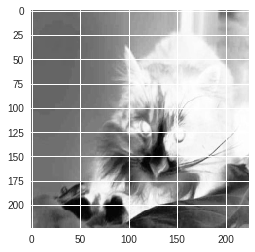

In [7]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
vgg = keras.applications.vgg16.VGG16()

![alt text](https://www.researchgate.net/publication/321829624/figure/fig2/AS:571845657481217@1513350037610/VGG16-architecture-16.ppm)

In [3]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model = Sequential()
for layer in vgg.layers:
  model.add(layer)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
model.layers.pop()

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(layers.Dense(2, activation=layers.activations.softmax))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr=1e-6),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [23]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=5,verbose=2,validation_split = 0.1)

ValueError: ignored

In [0]:
score=model2.evaluate(x=X_test, y=y_test)
print("test_loss and test_accuracy : ",score)